In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

df = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')

In [2]:
# The first set of models will be made using all the variables, unscaled.
# The second st will replace unscaled with scaled variables.
# After that, we'll reduce the number of variables to only those which were important
X_train = df.drop(columns=['churn', 'Unnamed: 0', 'customer_id', 'tenure_nml', 'monthly_charges_nml', 'total_charges_nml', 'churn_enc'])
X_train_scaled = df.drop(columns=['churn', 'Unnamed: 0', 'customer_id', 'tenure', 'tenure_years', 'monthly_charges', 'total_charges', 'churn_enc'])
X_valid = valid.drop(columns=['churn', 'Unnamed: 0', 'customer_id', 'tenure_nml', 'monthly_charges_nml', 'total_charges_nml', 'churn_enc'])
X_valid_scaled = valid.drop(columns=['churn', 'Unnamed: 0', 'customer_id', 'tenure', 'tenure_years', 'monthly_charges', 'total_charges', 'churn_enc'])

y_train = df[['churn']]
y_valid = valid[['churn']]

# Logistic Regression Model

In [3]:
logit = LogisticRegression().fit(X_train, y_train)
y_pred_LR = logit.predict(X_train)
y_pred_LR

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [4]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba

array([[0.42409232, 0.57590768],
       [0.32664666, 0.67335334],
       [0.52121221, 0.47878779],
       ...,
       [0.99637537, 0.00362463],
       [0.68385861, 0.31614139],
       [0.68532803, 0.31467197]])

In [5]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_LR), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,2989,331
churn,533,654


In [6]:
print(classification_report(y_train, y_pred_LR))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      3320
         Yes       0.66      0.55      0.60      1187

    accuracy                           0.81      4507
   macro avg       0.76      0.73      0.74      4507
weighted avg       0.80      0.81      0.80      4507



In [7]:
# Is it overfit?  --> Nope
y_pred_LRv = logit.predict(X_valid)

print(classification_report(y_valid, y_pred_LRv))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87       837
         Yes       0.64      0.53      0.58       290

    accuracy                           0.80      1127
   macro avg       0.74      0.71      0.72      1127
weighted avg       0.79      0.80      0.80      1127



## Logistic Regression Scaled

In [8]:
logit_s = LogisticRegression().fit(X_train_scaled, y_train)
y_pred_LRs = logit_s.predict(X_train_scaled)

In [9]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_LRs), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,3013,307
churn,519,668


In [10]:
print(classification_report(y_train, y_pred_LRs))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      3320
         Yes       0.69      0.56      0.62      1187

    accuracy                           0.82      4507
   macro avg       0.77      0.74      0.75      4507
weighted avg       0.81      0.82      0.81      4507



In [11]:
# Is it overfit? --> Nope
y_pred_LRvs = logit_s.predict(X_valid_scaled)

print(classification_report(y_valid, y_pred_LRvs))

              precision    recall  f1-score   support

          No       0.84      0.91      0.87       837
         Yes       0.66      0.51      0.57       290

    accuracy                           0.81      1127
   macro avg       0.75      0.71      0.72      1127
weighted avg       0.80      0.81      0.80      1127



# Decision Tree Model

In [12]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=123).fit(X_train, y_train)
y_pred_DT = clf.predict(X_train)

In [13]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_DT), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,3126,194
churn,721,466


In [14]:
print(classification_report(y_train, y_pred_DT))

              precision    recall  f1-score   support

          No       0.81      0.94      0.87      3320
         Yes       0.71      0.39      0.50      1187

    accuracy                           0.80      4507
   macro avg       0.76      0.67      0.69      4507
weighted avg       0.78      0.80      0.78      4507



In [15]:
# Is it overfit? --> Tiny bit
y_pred_DTv = clf.predict(X_valid)

print(classification_report(y_valid, y_pred_DTv))

              precision    recall  f1-score   support

          No       0.81      0.96      0.87       837
         Yes       0.73      0.34      0.46       290

    accuracy                           0.80      1127
   macro avg       0.77      0.65      0.67      1127
weighted avg       0.79      0.80      0.77      1127



## Decision Tree Scaled

In [16]:
clf_s = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=123).fit(X_train_scaled, y_train)
y_pred_DTs = clf_s.predict(X_train_scaled)

In [17]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_DTs), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,3126,194
churn,721,466


In [18]:
print(classification_report(y_train, y_pred_DTs))

              precision    recall  f1-score   support

          No       0.81      0.94      0.87      3320
         Yes       0.71      0.39      0.50      1187

    accuracy                           0.80      4507
   macro avg       0.76      0.67      0.69      4507
weighted avg       0.78      0.80      0.78      4507



In [19]:
# Is it overfit? --> Tiny bit
y_pred_DTvs = clf_s.predict(X_valid_scaled)

print(classification_report(y_valid, y_pred_DTvs))

              precision    recall  f1-score   support

          No       0.81      0.96      0.87       837
         Yes       0.73      0.34      0.46       290

    accuracy                           0.80      1127
   macro avg       0.77      0.65      0.67      1127
weighted avg       0.79      0.80      0.77      1127



# Random Forest Model

In [20]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                            min_samples_leaf=3, n_estimators=100, max_depth=20, random_state=123)

rf.fit(X_train, y_train)
y_pred_RF = rf.predict(X_train)

In [21]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_RF), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,3218,102
churn,299,888


In [22]:
print(classification_report(y_train, y_pred_RF))

              precision    recall  f1-score   support

          No       0.91      0.97      0.94      3320
         Yes       0.90      0.75      0.82      1187

    accuracy                           0.91      4507
   macro avg       0.91      0.86      0.88      4507
weighted avg       0.91      0.91      0.91      4507



In [23]:
# Is it overfit? --> Yes but the performance is similar to Logistic Regression and Decision Tree models
y_pred_RFv = rf.predict(X_valid)

print(classification_report(y_valid, y_pred_RFv))

              precision    recall  f1-score   support

          No       0.84      0.91      0.87       837
         Yes       0.64      0.49      0.56       290

    accuracy                           0.80      1127
   macro avg       0.74      0.70      0.71      1127
weighted avg       0.79      0.80      0.79      1127



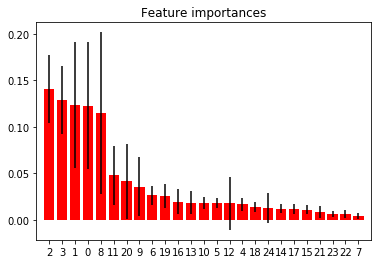

In [24]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [25]:
list(zip(X_train.columns, rf.feature_importances_))

[('tenure', 0.12280420993803297),
 ('tenure_years', 0.12350134110751312),
 ('monthly_charges', 0.14095097469453027),
 ('total_charges', 0.12865928862931386),
 ('senior_citizen', 0.016403772355916547),
 ('gender_enc', 0.018095964808023016),
 ('family_support', 0.02613396467246059),
 ('phone_service_enc', 0.0038261278281416246),
 ('contract_type_id', 0.11480587071872032),
 ('internet_service_type_id', 0.035714884595462015),
 ('extra_lines', 0.01820442337276365),
 ('internet_services', 0.04782071003397601),
 ('has_internet', 0.017429235753835662),
 ('online_security_enc', 0.018317015103936372),
 ('online_backup_enc', 0.011904372178966595),
 ('device_protection_enc', 0.0109395052545129),
 ('tech_support_enc', 0.019481299539943736),
 ('streaming_tv_enc', 0.011642079916052667),
 ('streaming_movies_enc', 0.013234212262884626),
 ('paperless_billing_enc', 0.02542657934338206),
 ('pay_elec_check', 0.04120511929054693),
 ('pay_mail', 0.008144876351020935),
 ('pay_bank', 0.006247689591585312),
 ('

In [26]:
# scaled model

In [27]:
rf_s = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                            min_samples_leaf=3, n_estimators=100, max_depth=20, random_state=123)

rf_s.fit(X_train_scaled, y_train)
y_pred_RFs = rf_s.predict(X_train_scaled)

In [28]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_RFs), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,3215,105
churn,327,860


In [29]:
print(classification_report(y_train, y_pred_RFs))

              precision    recall  f1-score   support

          No       0.91      0.97      0.94      3320
         Yes       0.89      0.72      0.80      1187

    accuracy                           0.90      4507
   macro avg       0.90      0.85      0.87      4507
weighted avg       0.90      0.90      0.90      4507



In [30]:
# Is it overfit? --> Yes but the performance is similar to Logistic Regression and Decision Tree models
y_pred_RFvs = rf_s.predict(X_valid_scaled)

print(classification_report(y_valid, y_pred_RFvs))

              precision    recall  f1-score   support

          No       0.84      0.91      0.87       837
         Yes       0.66      0.51      0.57       290

    accuracy                           0.81      1127
   macro avg       0.75      0.71      0.72      1127
weighted avg       0.80      0.81      0.80      1127



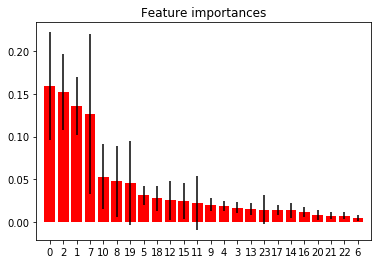

In [31]:
importances = rf_s.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_s.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

In [32]:
list(zip(X_train_scaled.columns, rf_s.feature_importances_))

[('tenure_nml', 0.15907516595711976),
 ('monthly_charges_nml', 0.13604128006431382),
 ('total_charges_nml', 0.15192849289736424),
 ('senior_citizen', 0.01669575890284111),
 ('gender_enc', 0.018609494498156395),
 ('family_support', 0.0308516783981805),
 ('phone_service_enc', 0.004543196884368864),
 ('contract_type_id', 0.126283948075012),
 ('internet_service_type_id', 0.04740033321729944),
 ('extra_lines', 0.020203386522878505),
 ('internet_services', 0.05267649213294427),
 ('has_internet', 0.022046563474864736),
 ('online_security_enc', 0.02516234028070242),
 ('online_backup_enc', 0.015138880294470254),
 ('device_protection_enc', 0.013602209996518686),
 ('tech_support_enc', 0.024585275417680488),
 ('streaming_tv_enc', 0.01163417653801195),
 ('streaming_movies_enc', 0.014070830002320614),
 ('paperless_billing_enc', 0.027333152246508598),
 ('pay_elec_check', 0.04537745499948813),
 ('pay_mail', 0.008130487360467243),
 ('pay_bank', 0.007137382981605195),
 ('pay_cc', 0.007095556814127704),


## KNN Model

In [33]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform').fit(X_train, y_train)

y_pred_knn = knn.predict(X_train)

In [34]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_knn), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,3057,263
churn,512,675


In [35]:
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89      3320
         Yes       0.72      0.57      0.64      1187

    accuracy                           0.83      4507
   macro avg       0.79      0.74      0.76      4507
weighted avg       0.82      0.83      0.82      4507



In [36]:
# Is it overfit? --> Yes
y_pred_knnv = knn.predict(X_valid)

print(classification_report(y_valid, y_pred_knnv))

              precision    recall  f1-score   support

          No       0.81      0.89      0.85       837
         Yes       0.56      0.40      0.47       290

    accuracy                           0.76      1127
   macro avg       0.68      0.65      0.66      1127
weighted avg       0.75      0.76      0.75      1127



### KNN Model Scaled

In [37]:
knn_s = KNeighborsClassifier(n_neighbors=5, weights='uniform').fit(X_train_scaled, y_train)

y_pred_knns = knn_s.predict(X_train_scaled)

In [38]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_knns), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,3051,269
churn,414,773


In [39]:
print(classification_report(y_train, y_pred_knns))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90      3320
         Yes       0.74      0.65      0.69      1187

    accuracy                           0.85      4507
   macro avg       0.81      0.79      0.80      4507
weighted avg       0.84      0.85      0.85      4507



In [40]:
# Is it overfit? --> Yes
y_pred_knnvs = knn_s.predict(X_valid_scaled)

print(classification_report(y_valid, y_pred_knnvs))

              precision    recall  f1-score   support

          No       0.83      0.86      0.85       837
         Yes       0.56      0.49      0.52       290

    accuracy                           0.77      1127
   macro avg       0.69      0.68      0.68      1127
weighted avg       0.76      0.77      0.76      1127



In [41]:
# After all this, we like the Random Forest model best
# Scaling the features makes no difference in model performance, so we won't use scaled features

## Decide which features to use

In [42]:
# We know tenure, monthly_charges and total_charges are important to the model
# -- but how will it perform without those features?
# This tells us which other features are meaningful

X_train_2 = X_train.drop(columns=['tenure', 'monthly_charges', 'total_charges', 'tenure_years'])
X_valid_2 = X_valid.drop(columns=['tenure', 'monthly_charges', 'total_charges', 'tenure_years'])

In [43]:
rf2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                            min_samples_leaf=3, n_estimators=100, max_depth=20, random_state=123)

rf2.fit(X_train_2, y_train)
y_pred_RF2 = rf2.predict(X_train_2)

In [44]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_RF2), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,3101,219
churn,473,714


In [45]:
print(classification_report(y_train, y_pred_RF2))

              precision    recall  f1-score   support

          No       0.87      0.93      0.90      3320
         Yes       0.77      0.60      0.67      1187

    accuracy                           0.85      4507
   macro avg       0.82      0.77      0.79      4507
weighted avg       0.84      0.85      0.84      4507



In [46]:
# Is it overfit? --> Yes but the performance is similar to Logistic Regression and Decision Tree models
y_pred_RFv2 = rf2.predict(X_valid_2)

print(classification_report(y_valid, y_pred_RFv2))

              precision    recall  f1-score   support

          No       0.82      0.89      0.86       837
         Yes       0.59      0.43      0.50       290

    accuracy                           0.78      1127
   macro avg       0.70      0.66      0.68      1127
weighted avg       0.76      0.78      0.76      1127



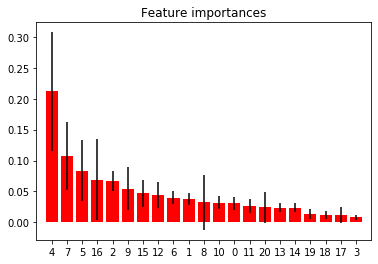

In [47]:
importances = rf2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_2.shape[1]), indices)
plt.xlim([-1, X_train_2.shape[1]])
plt.show()

In [48]:
list(zip(X_train_2.columns, rf2.feature_importances_))

[('senior_citizen', 0.03112286930778966),
 ('gender_enc', 0.03774324918961097),
 ('family_support', 0.0670351533935705),
 ('phone_service_enc', 0.008490415432637028),
 ('contract_type_id', 0.21177206118529515),
 ('internet_service_type_id', 0.08332965529940843),
 ('extra_lines', 0.04008485148038852),
 ('internet_services', 0.10654078766768181),
 ('has_internet', 0.032289436886230864),
 ('online_security_enc', 0.05414635758597596),
 ('online_backup_enc', 0.031515188421037565),
 ('device_protection_enc', 0.026965340301601227),
 ('tech_support_enc', 0.043942687262694624),
 ('streaming_tv_enc', 0.02384989669230043),
 ('streaming_movies_enc', 0.023717365390402464),
 ('paperless_billing_enc', 0.046832279630411734),
 ('pay_elec_check', 0.06920245204930357),
 ('pay_mail', 0.01157208203624663),
 ('pay_bank', 0.011952282898675717),
 ('pay_cc', 0.013582524862989422),
 ('pay_auto', 0.02431306302574773)]

In order of importance, the top 10 are:
        
        1. contract_type_id
        2. internet_services
        3. internet_service_type_id
        4. pay_elec_check
        5. family_support
        6. online_security_enc
        7. extra_lines
        8. paperless_billing_enc
        9. has_internet
        10. gender_enc

Tenure and tenure_years are essentially the same info, but the model did slightly better with tenure_years, so that is the feature that will be included.

## The model with reduced features will include:
 1. total_charges
 2. monthly_charges
 3. tenure_years
 4. contract_type_id
 5. internet_services
 6. internet_service_type_id
 7. pay_elec_check
 8. family_support
 9. online_security_enc
 10. extra_lines

In [49]:
X_tr = df[['total_charges', 'monthly_charges', 'tenure_years', 'contract_type_id',
           'internet_services', 'internet_service_type_id', 'pay_elec_check',
           'family_support', 'online_security_enc', 'extra_lines']]
X_v = valid[['total_charges', 'monthly_charges', 'tenure_years', 'contract_type_id',
           'internet_services', 'internet_service_type_id', 'pay_elec_check',
           'family_support', 'online_security_enc', 'extra_lines']]

In [50]:
rf_f = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                            min_samples_leaf=3, n_estimators=100, max_depth=20, random_state=123)

rf_f.fit(X_tr, y_train)
y_pred_RFf = rf_f.predict(X_tr)

In [51]:
labels = ['loyal', 'churn']
predicted_labels = [name + " predicted" for name in labels ]
conf = pd.DataFrame(confusion_matrix(y_train, y_pred_RFf), index=labels, columns=[predicted_labels])
conf.index.name = "actual"
conf

,loyal predicted,churn predicted
actual,,
loyal,3205,115
churn,311,876


In [52]:
print(classification_report(y_train, y_pred_RFf))

              precision    recall  f1-score   support

          No       0.91      0.97      0.94      3320
         Yes       0.88      0.74      0.80      1187

    accuracy                           0.91      4507
   macro avg       0.90      0.85      0.87      4507
weighted avg       0.90      0.91      0.90      4507



In [53]:
# Is it overfit? --> Yes but the performance is similar to Logistic Regression and Decision Tree models
y_pred_RFfv = rf_f.predict(X_v)

print(classification_report(y_valid, y_pred_RFfv))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87       837
         Yes       0.63      0.50      0.56       290

    accuracy                           0.80      1127
   macro avg       0.74      0.70      0.71      1127
weighted avg       0.79      0.80      0.79      1127



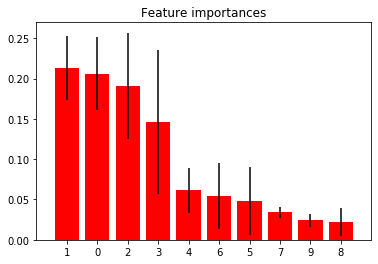

In [54]:
importances = rf_f.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_f.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_tr.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_tr.shape[1]), indices)
plt.xlim([-1, X_tr.shape[1]])
plt.show()

In [55]:
list(zip(X_tr.columns, rf_f.feature_importances_))

[('total_charges', 0.20571611329626388),
 ('monthly_charges', 0.2127262895249699),
 ('tenure_years', 0.19106735944245057),
 ('contract_type_id', 0.14594000029984086),
 ('internet_services', 0.061162350941248035),
 ('internet_service_type_id', 0.04810515763243134),
 ('pay_elec_check', 0.054640636795626495),
 ('family_support', 0.03429081863667017),
 ('online_security_enc', 0.02203414445573432),
 ('extra_lines', 0.024317128974764415)]

# Function Testing

In [56]:
# Functions to be tested here

def model_maker(X, y, model_type, random_state):
    if model_type == 'LR':
        model = LogisticRegression(random_state=random_state)
        return model.fit(X, y)
    elif model_type == 'DT':
        model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=random_state)
        return model.fit(X, y)
    elif model_type == 'RF':
        model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                                       min_samples_leaf=3, n_estimators=100, max_depth=20, random_state=random_state)
        return model.fit(X, y)
    else:
        return print ("unacceptable model_type entry. options are: LR, DT or RF")
     
def model_predictor(X, model):
    predictions = model.predict(X)
    # Calulate probabilities and turn them into a df
    probs = model.predict_proba(X)
    return predictions, probs
    
def model_evaluator(y, predictions):    
    # Confusion Matrix
    labels = ['loyal', 'churn']
    predicted_labels = [name + " predicted" for name in labels ]
    conf_matrix = pd.DataFrame(confusion_matrix(y, predictions), index=labels, columns=[predicted_labels])
    conf_matrix.index.name = "actual"
    # Classification Report
    class_report = classification_report(y, predictions)
    return conf_matrix, class_report

In [57]:
DT_model = model_maker(X_tr, y_train, 'DT', 824)
DT_preds, DT_probs = model_predictor(X_tr, DT_model)
DT_conf, DT_report = model_evaluator(y_train, DT_preds)
print (DT_report)

              precision    recall  f1-score   support

          No       0.81      0.94      0.87      3320
         Yes       0.70      0.39      0.50      1187

    accuracy                           0.80      4507
   macro avg       0.76      0.67      0.69      4507
weighted avg       0.78      0.80      0.77      4507



In [58]:
DTv_preds, DTv_probs = model_predictor(X_v, DT_model)
DTv_conf, DTv_report = model_evaluator(y_valid, DTv_preds)
print (DTv_report)

              precision    recall  f1-score   support

          No       0.81      0.96      0.87       837
         Yes       0.73      0.34      0.46       290

    accuracy                           0.80      1127
   macro avg       0.77      0.65      0.67      1127
weighted avg       0.79      0.80      0.77      1127



In [59]:
DT_conf

,loyal predicted,churn predicted
actual,,
loyal,3123,197
churn,722,465


In [60]:
DTv_conf

,loyal predicted,churn predicted
actual,,
loyal,800,37
churn,192,98


# Model evaluation

In [61]:
# Baseline for model evaluation is the most frequent value in the churn column
y_train.churn.value_counts()

No     3320
Yes    1187
Name: churn, dtype: int64

In [62]:
# Create prediction evaluations dataframe to compare models to baseline
predictions = pd.DataFrame({
    'actual': y_train.churn,
    'baseline': 'No',
})
predictions.head()

,actual,baseline
0,No,No
1,Yes,No
2,Yes,No
3,No,No
4,No,No


In [63]:
predictions['LinearRegression'] = y_pred_LR
predictions['DecisionTree'] = y_pred_DT
predictions['RandomForest'] = y_pred_RF

In [64]:
predictions.head()

,actual,baseline,LinearRegression,DecisionTree,RandomForest
0,No,No,Yes,No,No
1,Yes,No,Yes,Yes,Yes
2,Yes,No,No,No,Yes
3,No,No,No,No,No
4,No,No,Yes,Yes,Yes


## Test the chosen model on out-of-sample data

#### Chosen Model: Decision Tree w/ all variables
    - Chosen because there was not much benefit to the model with reduced variables

In [69]:
test = pd.read_csv('test.csv')

X_train = df.drop(columns=['churn', 'Unnamed: 0', 'customer_id', 'tenure_nml', 'monthly_charges_nml', 'total_charges_nml', 'churn_enc'])
X_valid = valid.drop(columns=['churn', 'Unnamed: 0', 'customer_id', 'tenure_nml', 'monthly_charges_nml', 'total_charges_nml', 'churn_enc'])
X_test = test.drop(columns=['churn', 'Unnamed: 0', 'customer_id', 'tenure_nml', 'monthly_charges_nml', 'total_charges_nml', 'churn_enc'])

y_train = df.churn
y_valid = valid.churn
y_test = test.churn

In [70]:
DT_model = model_maker(X_train, y_train, 'DT', 824)
DT_preds, DT_probs = model_predictor(X_train, DT_model)
DT_conf, DT_report = model_evaluator(y_train, DT_preds)
print (DT_report)

              precision    recall  f1-score   support

          No       0.81      0.94      0.87      3320
         Yes       0.70      0.40      0.51      1187

    accuracy                           0.80      4507
   macro avg       0.76      0.67      0.69      4507
weighted avg       0.78      0.80      0.78      4507



In [72]:
DT_conf

,loyal predicted,churn predicted
actual,,
loyal,3118,202
churn,714,473


In [71]:
# Test model performance on validation data
DTv_preds, DTv_probs = model_predictor(X_valid, DT_model)
DTv_conf, DTv_report = model_evaluator(y_valid, DTv_preds)
print (DTv_report)

              precision    recall  f1-score   support

          No       0.81      0.95      0.87       837
         Yes       0.72      0.34      0.46       290

    accuracy                           0.80      1127
   macro avg       0.76      0.65      0.67      1127
weighted avg       0.78      0.80      0.77      1127



In [73]:
DTv_conf

,loyal predicted,churn predicted
actual,,
loyal,798,39
churn,192,98


In [74]:
# Test model performance on out-of-sample data
DTt_preds, DTt_probs = model_predictor(X_test, DT_model)
DTt_conf, DTt_report = model_evaluator(y_test, DTt_preds)
print (DTt_report)

              precision    recall  f1-score   support

          No       0.79      0.94      0.86      1017
         Yes       0.69      0.36      0.47       392

    accuracy                           0.78      1409
   macro avg       0.74      0.65      0.67      1409
weighted avg       0.76      0.78      0.75      1409

